In [4]:
from speech_enhancement_methods.utils import snr_db, resample_signal
import numpy as np
from scipy.io import wavfile
from speech_enhancement_methods.methods import wiener_filter, spectral_subtraction
from pesq import pesq
from pystoi import stoi
import matplotlib.pyplot as plt

In [15]:
sr_noisy, noisy = wavfile.read("noisy_testset_wav/p232_130.wav")
sr_clean, clean = wavfile.read("clean_testset_wav/p232_130.wav")

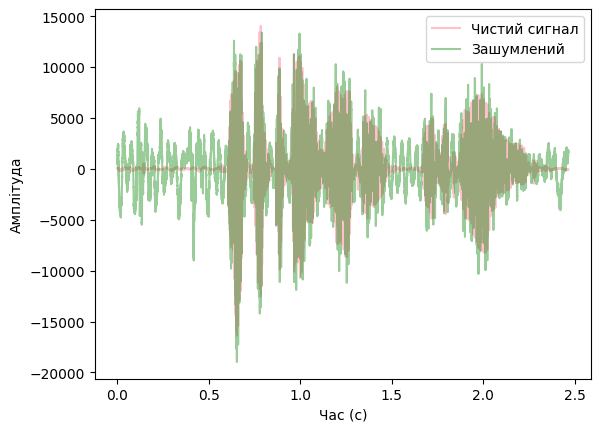

In [17]:
t = np.linspace(0., noisy.shape[0] / sr_noisy, noisy.shape[0])

plt.plot(t, clean, label="Чистий сигнал", color="pink")
plt.plot(t, noisy, label="Зашумлений", alpha=0.4, color="green")

plt.legend()
plt.xlabel("Час (с)")
plt.ylabel("Амплітуда")
plt.show()

In [4]:
from speech_enhancement_methods.methods import *
from utils import resample_signal

In [25]:
sr_noisy, noisy = wavfile.read("results/p232_092_noisy.wav")
sr_clean, clean = wavfile.read("clean_testset_wav/p232_092.wav")
sr_clean_w, clean_w = wavfile.read("results/p232_092__clean.wav")
clean_w = clean_w.astype(np.float32)
noisy = noisy.astype(np.float32)
clean = clean.astype(np.float32)
clean = resample_signal(clean, sr_clean, 16000)
noisy = resample_signal(noisy, sr_noisy, 16000)
clean_w = resample_signal(clean_w, sr_clean_w, 16000)
noise_estimate = noisy[:int(0.5 * 16000)]

In [19]:
spectral = spectral_subtraction(noisy, noise_estimate)
wiener = wiener_filter(noisy, noise_estimate)
sr_wavenet, wavenet = wavfile.read("results/p232_092_wavenet.wav")
wavenet = wavenet.astype(np.float32)
sr_segan, segan = wavfile.read("results/p232_092_segan.wav")
segan = segan.astype(np.float32)
sr_adv_segan, adv_segan = wavfile.read("results/p232_092_adv_segan.wav")
adv_segan = adv_segan.astype(np.float32)

In [23]:
clean.shape[0], noisy.shape[0]

(31488, 31488)

Text(0.5, 1.0, 'Advanced SEGAN')

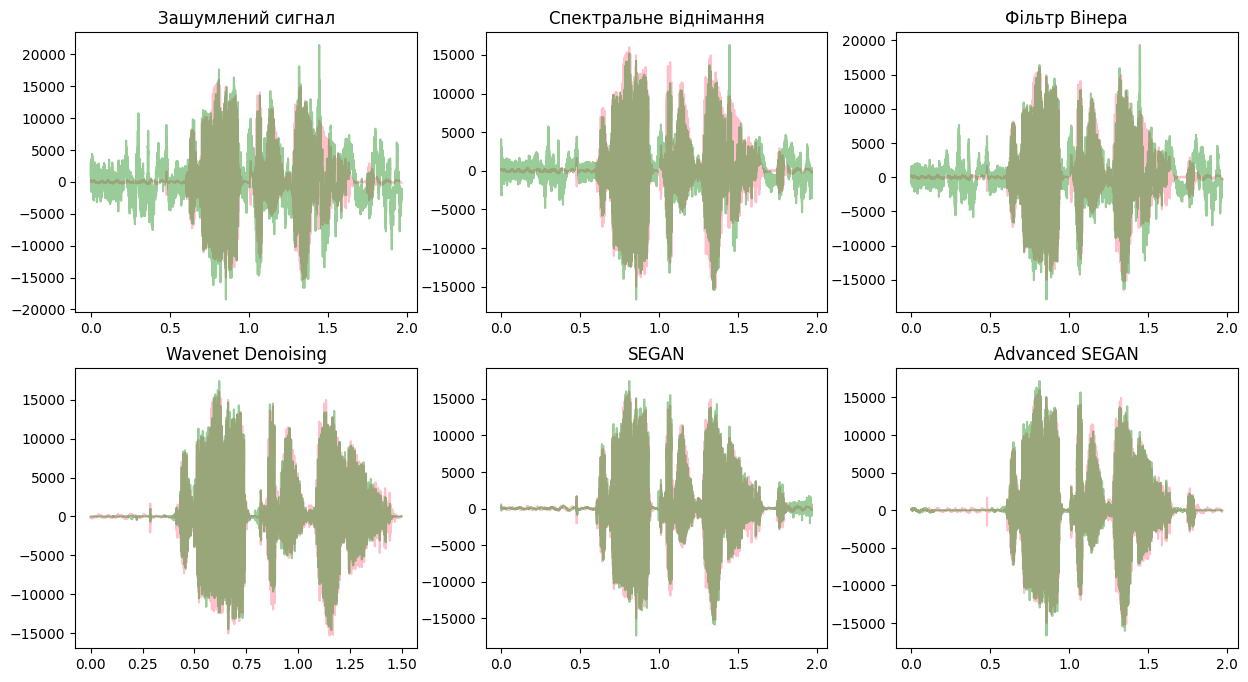

In [27]:
t = np.linspace(0., noisy.shape[0] / 16000, noisy.shape[0])
t_w = np.linspace(0., wavenet.shape[0] / 16000, wavenet.shape[0])

figure, axis = plt.subplots(2, 3, figsize=(15, 8))

axis[0, 0].plot(t, clean, color="pink")
axis[0, 0].plot(t, noisy, alpha=0.4, color="green")
axis[0, 0].set_title("Зашумлений сигнал")

axis[0, 1].plot(t, clean, color="pink")
axis[0, 1].plot(t, spectral, alpha=0.4, color="green")
axis[0, 1].set_title("Спектральне віднімання")

axis[0, 2].plot(t, clean, color="pink")
axis[0, 2].plot(t, wiener, alpha=0.4, color="green")
axis[0, 2].set_title("Фільтр Вінера")

axis[1, 0].plot(t_w, clean_w, color="pink")
axis[1, 0].plot(t_w, wavenet, alpha=0.4, color="green")
axis[1, 0].set_title("Wavenet Denoising")

axis[1, 1].plot(t, clean, color="pink")
axis[1, 1].plot(t, segan, alpha=0.4, color="green")
axis[1, 1].set_title("SEGAN")

axis[1, 2].plot(t, clean, color="pink")
axis[1, 2].plot(t, adv_segan, alpha=0.4, color="green")
axis[1, 2].set_title("Advanced SEGAN")

In [2]:
# p257_008

sr_noisy, noisy = wavfile.read("noisy_testset_wav/p257_008.wav")
sr_clean, clean = wavfile.read("clean_testset_wav/p257_008.wav")

noisy = noisy.astype(np.float32)
clean = clean.astype(np.float32)

noise = noisy - clean

In [7]:
clean.shape

(267989,)

In [6]:
t.shape

(267989,)

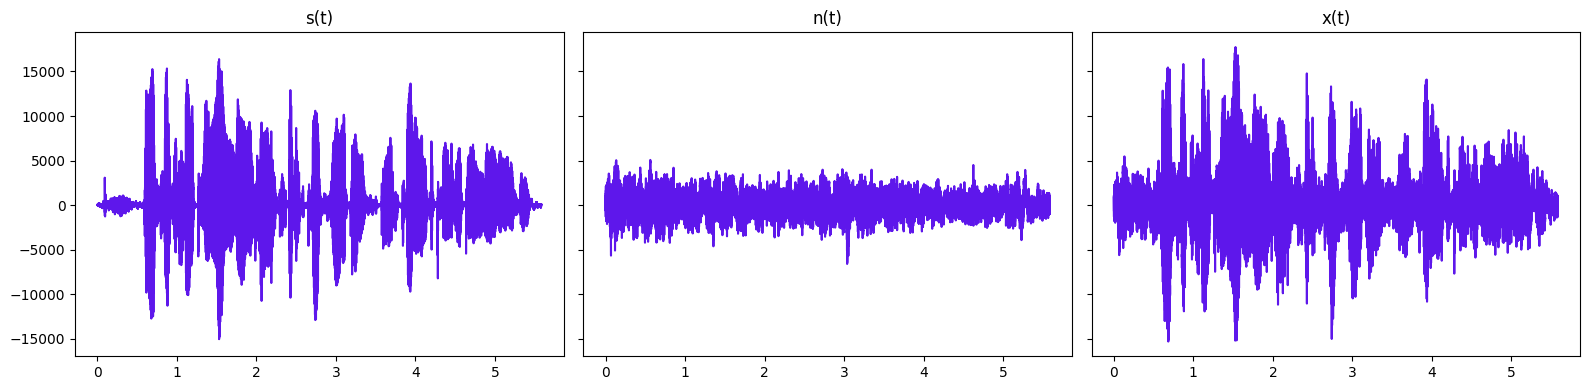

In [19]:
sr_noisy, noisy = wavfile.read("noisy_testset_wav/p257_008.wav")
sr_clean, clean = wavfile.read("clean_testset_wav/p257_008.wav")

noisy = noisy.astype(np.float32)
clean = clean.astype(np.float32)

noise = noisy - clean

figure, axis = plt.subplots(1, 3, figsize=(16, 4), sharey=True,)

t = np.linspace(0., noisy.shape[0] / sr_noisy, noisy.shape[0])

axis[0].plot(t, clean, "#5e17eb")
axis[0].set_title("s(t)")

axis[1].plot(t, noise, "#5e17eb")
axis[1].set_title("n(t)")

axis[2].plot(t, noisy, "#5e17eb")
axis[2].set_title("x(t)")

plt.tight_layout()
plt.show()


In [20]:
def vis(clean_file, noisy_file, enhanced_file):
    sr_noisy, noisy = wavfile.read(noisy_file)
    sr_clean, clean = wavfile.read(clean_file)
    sr_adv_s, adv_s = wavfile.read(enhanced_file)
    noisy = noisy.astype(np.float32)
    clean = clean.astype(np.float32)
    clean = resample_signal(clean, sr_clean, 16000)
    noisy = resample_signal(noisy, sr_noisy, 16000)

    pesq_n = round(pesq(16000, clean, noisy), 2)
    pesq_a = round(pesq(16000, clean, adv_s), 2)

    stoi_n = round(stoi(clean, noisy, 16000), 2)
    stoi_a = round(stoi(clean, adv_s, 16000), 2)

    figure, axis = plt.subplots(1, 2, figsize=(8, 4))

    t = np.linspace(0., noisy.shape[0] / sr_noisy, noisy.shape[0])

    axis[0].plot(t, noisy, "#5e17eb")
    axis[0].set_title(f"Зашумлений: PESQ={pesq_n}, STOI={stoi_n}")

    axis[1].plot(t, adv_s, "#5e17eb")
    axis[1].set_title(f"Покращений: PESQ={pesq_a}, STOI={stoi_a}")

    # plt.title("p232_145")
    figure.suptitle(noisy_file[-12:-4])

    plt.tight_layout()
    plt.show()
